In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
data4b = pd.read_csv("question4b.csv",header=None)
col_name_a = list(data4b.values.ravel())
data4a = pd.read_csv("question4a.csv", names=col_name_a)
col_name_c = ["city", "abbr","col3"]
data4c = pd.read_csv("question4c.csv", names=col_name_c)

In [3]:
data4a

,climate,housing,health,crime,transportation,education,arts,recreation,economics
0,521,6200,237,923,4031,2757,996,1405,7633
1,575,8138,1656,886,4883,2438,5564,2632,4350
2,468,7339,618,970,2531,2560,237,859,5250
3,476,7908,1431,610,6883,3399,4655,1617,5864
4,659,8393,1853,1483,6558,3026,4496,2612,5727
...,...,...,...,...,...,...,...,...,...
324,562,8715,1805,680,3643,3299,1784,910,5040
325,535,6440,317,1106,3731,2491,996,2140,4986
326,540,8371,713,440,2267,2903,1022,842,4946
327,570,7021,1097,938,3374,2920,2797,1327,3894


In [4]:
data4b

,0
0,climate
1,housing
2,health
3,crime
4,transportation
5,education
6,arts
7,recreation
8,economics


In [5]:
data4c

,city,abbr,col3
0,Abilene,TX,NaN
1,Akron,OH,NaN
2,Albany,GA,NaN
3,Albany-Troy,NY,NaN
4,Albuquerque,NM,NaN
...,...,...,...
324,Worcester,MA,NaN
325,Yakima,WA,NaN
326,York,PA,NaN
327,Youngstown-Warren,OH,NaN


In [6]:
data4 = pd.concat([data4a,data4c], axis=1)

In [7]:
data4.columns

Index(['climate', 'housing', 'health', 'crime', 'transportation', 'education',
       'arts', 'recreation', 'economics', 'city', 'abbr', 'col3'],
      dtype='object')

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Extract the numerical columns for normalization
numerical_columns = ['climate', 'housing', 'health', 'crime', 'transportation', 'education',
                     'arts', 'recreation', 'economics']

# Select only the numerical columns for normalization
data_to_normalize = data4[numerical_columns]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
normalized_data = scaler.fit_transform(data_to_normalize)

# Create a DataFrame with the normalized data
normalized_df_left = pd.DataFrame(normalized_data, columns=numerical_columns)

# Combine the normalized numerical columns with the non-numerical columns
normalized_df_right = pd.concat([normalized_df_left, data4[['city', 'abbr', 'col3']]], axis=1)

# Display the normalized DataFrame
print(normalized_df_left)
print(normalized_df_right)

      climate   housing    health     crime  transportation  education  \
0    0.516770  0.056328  0.024849  0.280822        0.385829   0.507692   
1    0.583851  0.161193  0.206609  0.263927        0.499733   0.354327   
2    0.450932  0.117959  0.073652  0.302283        0.185294   0.412981   
3    0.460870  0.148747  0.177789  0.137900        0.767112   0.816346   
4    0.688199  0.174991  0.231843  0.536530        0.723663   0.637019   
..        ...       ...       ...       ...             ...        ...   
324  0.567702  0.192414  0.225695  0.169863        0.333957   0.768269   
325  0.534161  0.069314  0.035097  0.364384        0.345722   0.379808   
326  0.540373  0.173800  0.085820  0.060274        0.150000   0.577885   
327  0.577640  0.100752  0.135007  0.287671        0.297995   0.586058   
328  0.624845  0.146962  0.021647  0.397717        0.216979   0.329808   

         arts  recreation  economics  
0    0.016651    0.245556   0.661572  
1    0.097225    0.518222   0.188

In [9]:
normalized_df_right['abbr']

0       TX
1       OH
2       GA
3       NY
4       NM
      ... 
324     MA
325     WA
326     PA
327     OH
328     CA
Name: abbr, Length: 329, dtype: object

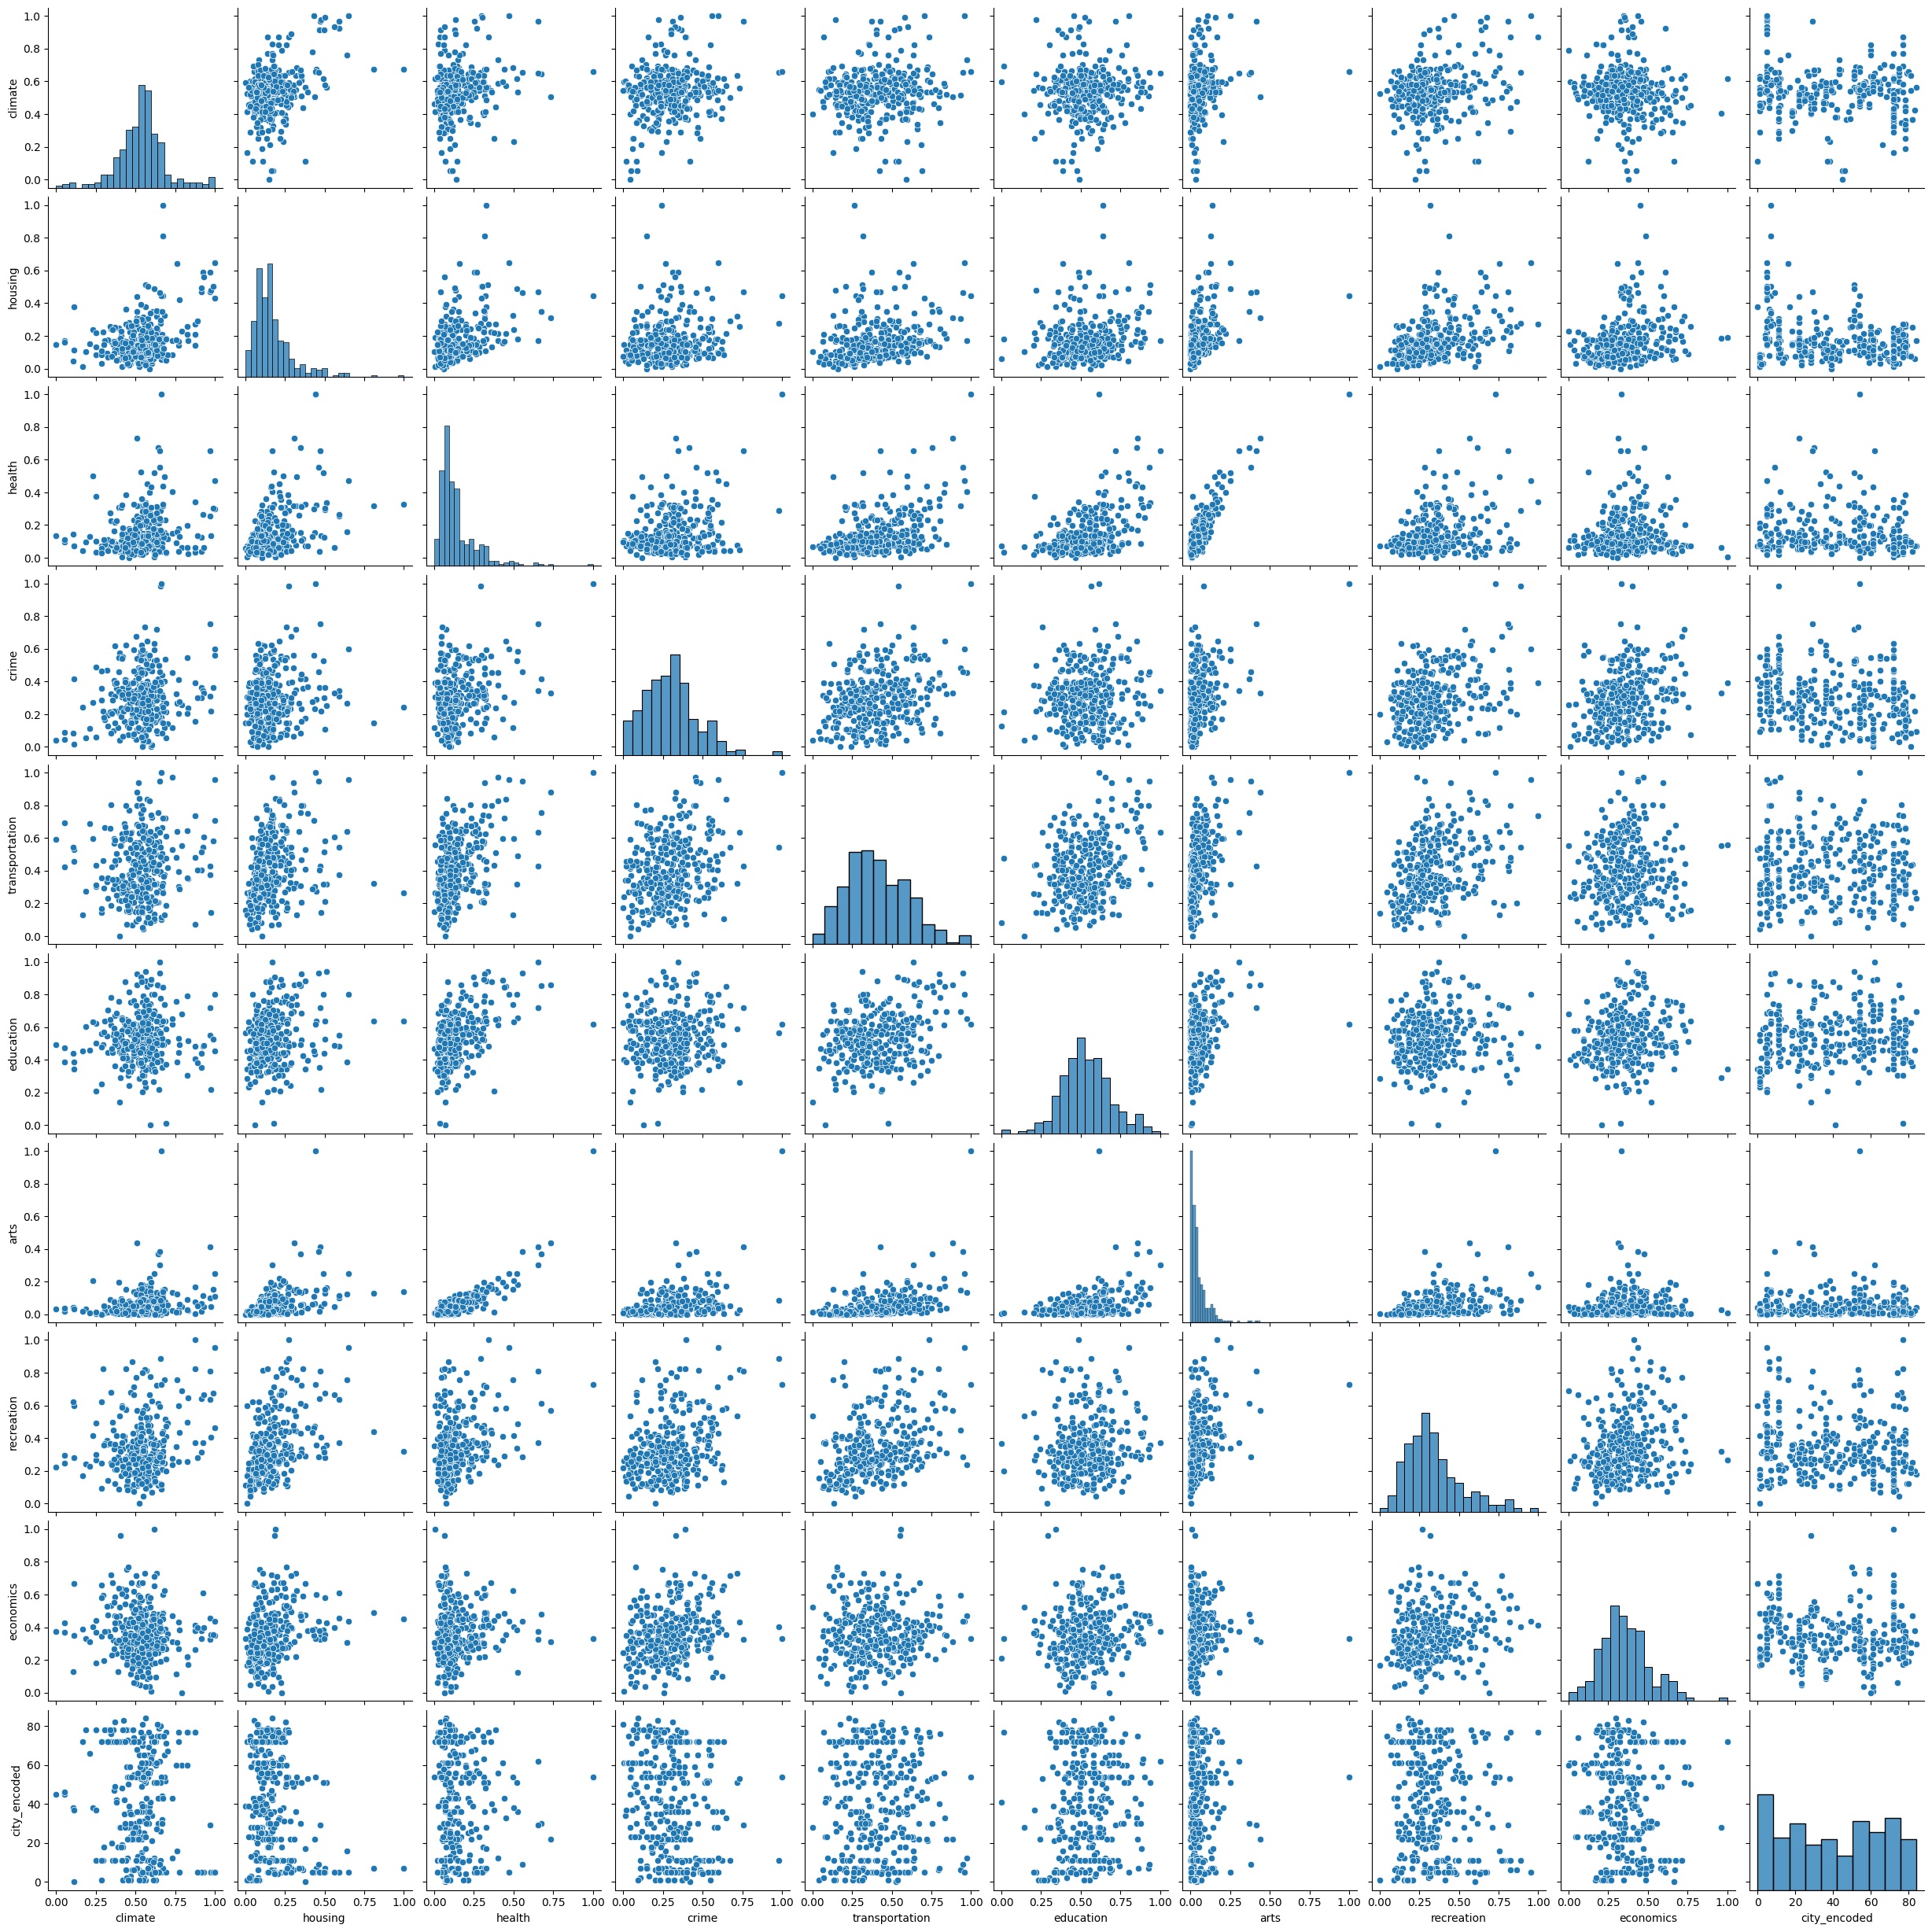

In [10]:

# Assuming you have a DataFrame named df
# Drop 'col3'
#normalized_df_right = normalized_df_right.drop('col3', axis=1)

# Encode 'city' or 'abbr' column
label_encoder = LabelEncoder()
normalized_df_right['city_encoded'] = label_encoder.fit_transform(normalized_df_right['abbr'])  # Replace 'city' with 'abbr' if needed
# Visualize the data
sns.pairplot(normalized_df_right)
plt.show()

In [11]:
normalized_df_right['city_encoded']

0      72
1      56
2      12
3      54
4      52
       ..
324    30
325    77
326    61
327    56
328     5
Name: city_encoded, Length: 329, dtype: int64

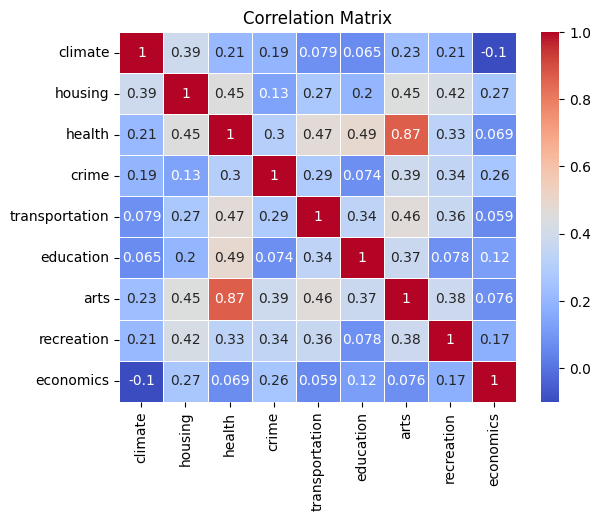

In [12]:
# Perform exploratory analysis
correlation_matrix = normalized_df_left.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

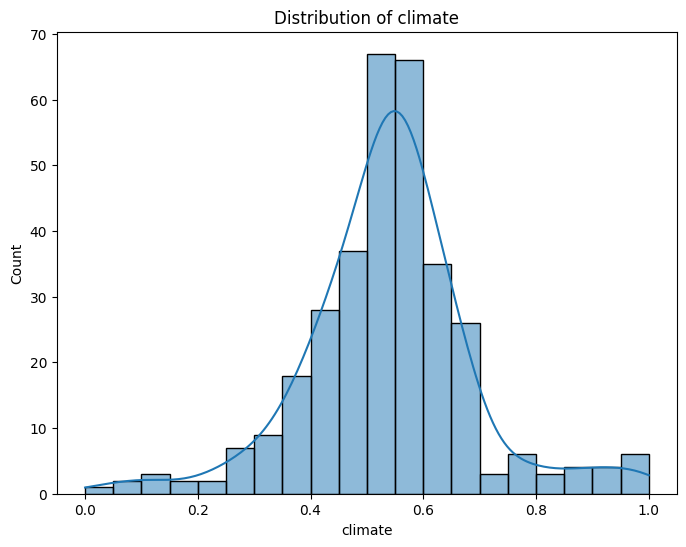

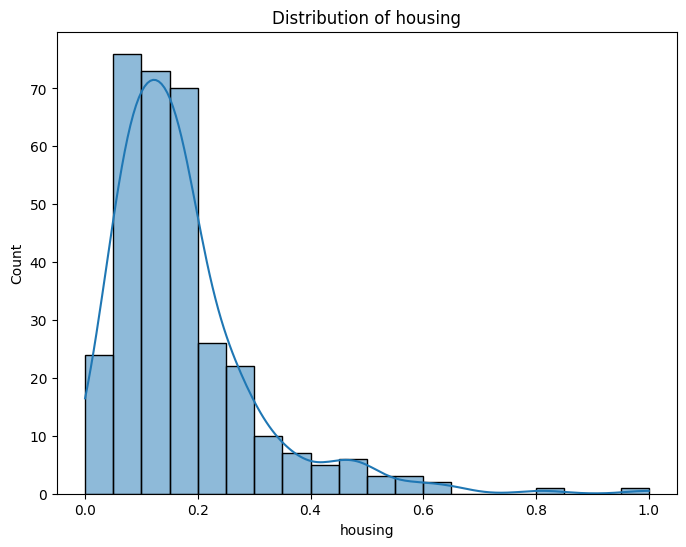

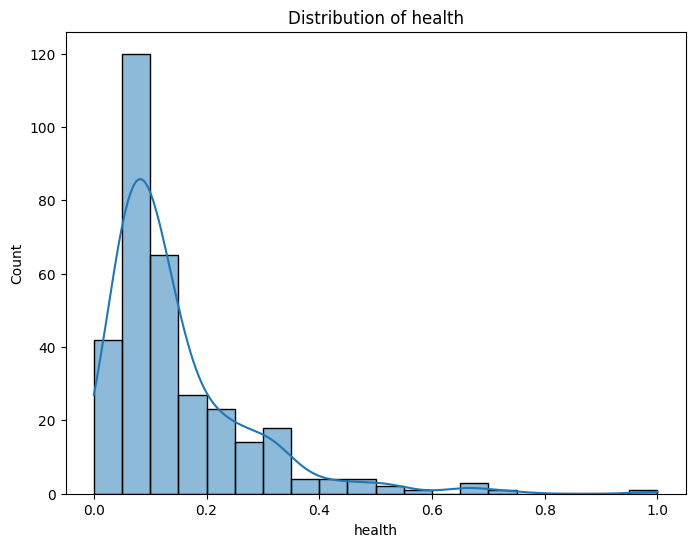

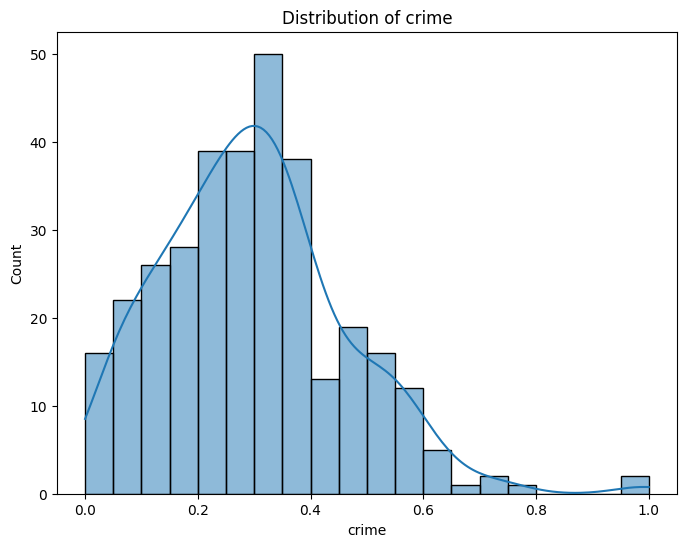

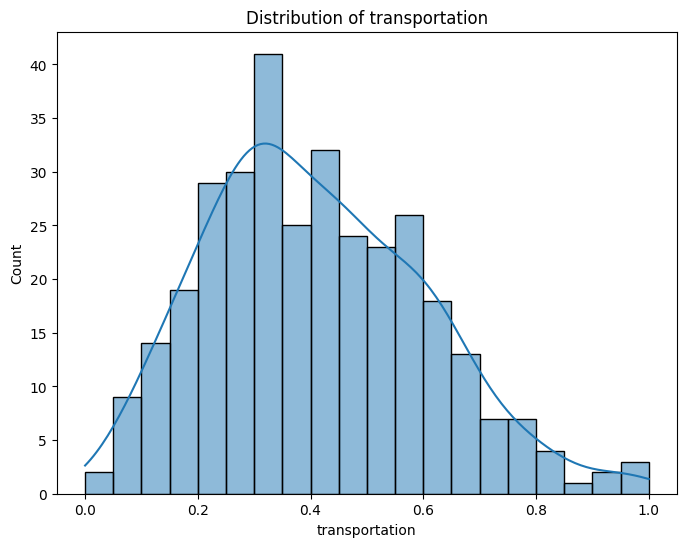

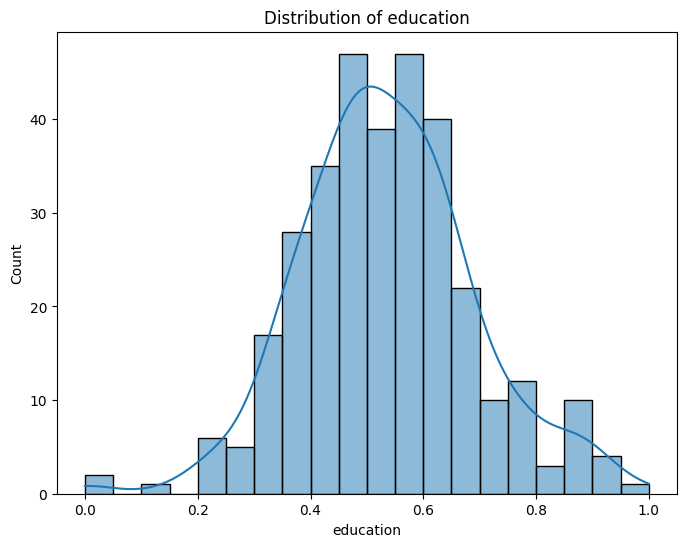

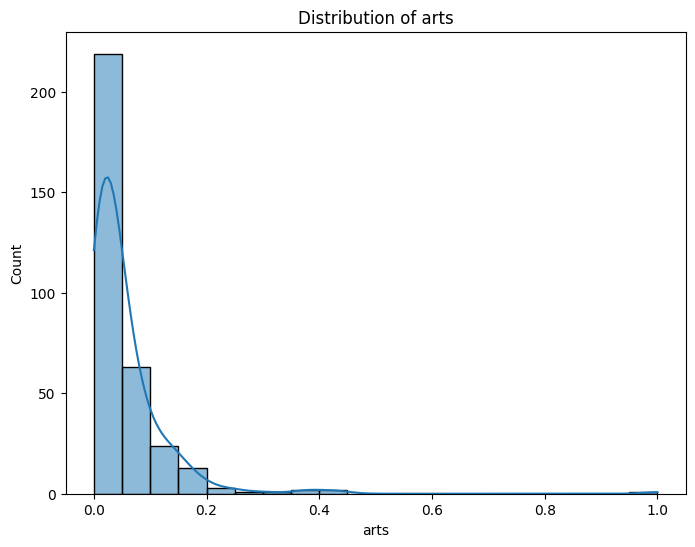

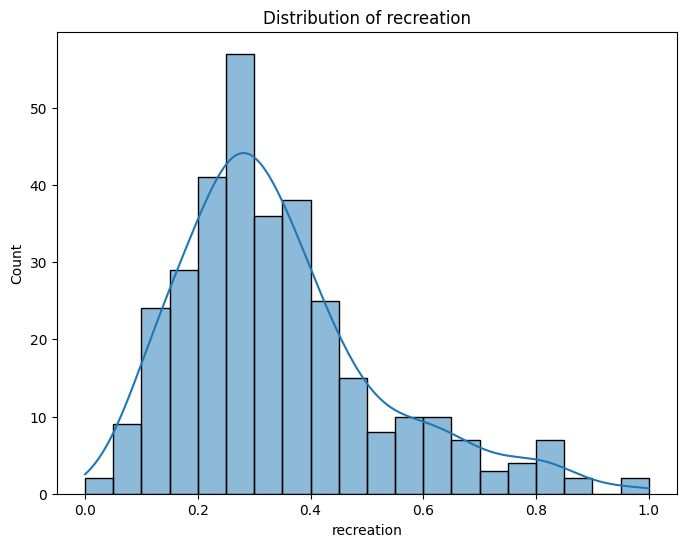

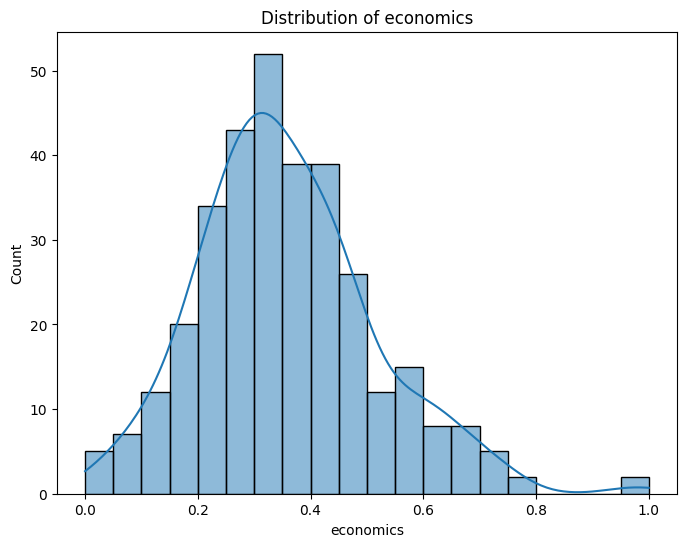

In [13]:
# Visualize the distribution of each feature
for column in normalized_df_left.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(normalized_df_left[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

/dev1/genomeGPT/anaconda3/envs/optinum/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


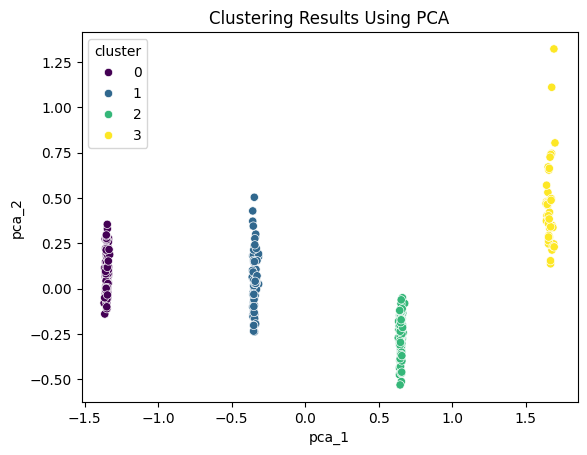

In [14]:
# Perform clustering using KMeans
features = normalized_df_left
kmeans = KMeans(n_clusters=4)  # You can change the number of clusters as needed
normalized_df_left['cluster'] = kmeans.fit_predict(features)

# Visualize clustering results using PCA (assuming you have more than 2 features)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)
normalized_df_left['pca_1'] = pca_result[:, 0]
normalized_df_left['pca_2'] = pca_result[:, 1]

sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', data=normalized_df_left, palette='viridis')
plt.title('Clustering Results Using PCA')
plt.show()

In [15]:
normalized_df_left

,climate,housing,health,crime,transportation,education,arts,recreation,economics,cluster,pca_1,pca_2
0,0.516770,0.056328,0.024849,0.280822,0.385829,0.507692,0.016651,0.245556,0.661572,1,-0.355347,-0.101378
1,0.583851,0.161193,0.206609,0.263927,0.499733,0.354327,0.097225,0.518222,0.188176,0,-1.343344,0.099001
2,0.450932,0.117959,0.073652,0.302283,0.185294,0.412981,0.003263,0.124222,0.317952,2,0.648991,-0.339445
3,0.460870,0.148747,0.177789,0.137900,0.767112,0.816346,0.081192,0.292667,0.406489,0,-1.353499,0.219190
4,0.688199,0.174991,0.231843,0.536530,0.723663,0.637019,0.078387,0.513778,0.386734,3,1.645820,0.402725
...,...,...,...,...,...,...,...,...,...,...,...,...
324,0.567702,0.192414,0.225695,0.169863,0.333957,0.768269,0.030551,0.135556,0.287671,2,0.660350,-0.110825
325,0.534161,0.069314,0.035097,0.364384,0.345722,0.379808,0.016651,0.408889,0.279885,2,0.643589,-0.120369
326,0.540373,0.173800,0.085820,0.060274,0.150000,0.577885,0.017110,0.120444,0.274117,2,0.658207,-0.369650
327,0.577640,0.100752,0.135007,0.287671,0.297995,0.586058,0.048419,0.228222,0.122422,2,0.653394,-0.171719


In [16]:
normalized_df_left['city'] = normalized_df_right['city']

In [17]:
normalized_df_left

,climate,housing,health,crime,transportation,education,arts,recreation,economics,cluster,pca_1,pca_2,city
0,0.516770,0.056328,0.024849,0.280822,0.385829,0.507692,0.016651,0.245556,0.661572,1,-0.355347,-0.101378,Abilene
1,0.583851,0.161193,0.206609,0.263927,0.499733,0.354327,0.097225,0.518222,0.188176,0,-1.343344,0.099001,Akron
2,0.450932,0.117959,0.073652,0.302283,0.185294,0.412981,0.003263,0.124222,0.317952,2,0.648991,-0.339445,Albany
3,0.460870,0.148747,0.177789,0.137900,0.767112,0.816346,0.081192,0.292667,0.406489,0,-1.353499,0.219190,Albany-Troy
4,0.688199,0.174991,0.231843,0.536530,0.723663,0.637019,0.078387,0.513778,0.386734,3,1.645820,0.402725,Albuquerque
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,0.567702,0.192414,0.225695,0.169863,0.333957,0.768269,0.030551,0.135556,0.287671,2,0.660350,-0.110825,Worcester
325,0.534161,0.069314,0.035097,0.364384,0.345722,0.379808,0.016651,0.408889,0.279885,2,0.643589,-0.120369,Yakima
326,0.540373,0.173800,0.085820,0.060274,0.150000,0.577885,0.017110,0.120444,0.274117,2,0.658207,-0.369650,York
327,0.577640,0.100752,0.135007,0.287671,0.297995,0.586058,0.048419,0.228222,0.122422,2,0.653394,-0.171719,Youngstown-Warren


In [20]:
print(f" cluster 0 {normalized_df_left[normalized_df_left.cluster==0]['city'].tolist()}")
print(end='-'*200 + '\n')
print(f" cluster 1 {normalized_df_left[normalized_df_left.cluster==1]['city'].tolist()}")
print(end='-'*200 + '\n')
print(f" cluster 2 {normalized_df_left[normalized_df_left.cluster==2]['city'].tolist()}")
print(end='-'*200 + '\n')
print(f" cluster 3 {normalized_df_left[normalized_df_left.cluster==3]['city'].tolist()}")

 cluster 0 ['Akron', 'Albany-Troy', 'Alton', 'Amarillo', 'Asheville', 'Bangor', 'Battle Creek', 'Bellingham', 'Billings', 'Binghampton', 'Birmingham', 'Bloomington-Normal', 'Boise City', 'Buffalo', 'Cedar Rapids', 'Champaign-Urbana-Rantoul', 'Charleston', 'Charlotte-Gastonia-Rock Hill', 'Charlottesville', 'Chico', 'Cincinnati', 'Columbia', 'Columbus', 'Davenport-Rock Island-Moline', 'Dayton-Springfield', 'Des Moines', 'Duluth', 'East St. Louis-Belleville', 'Erie', 'Eugene-Springfield', 'Fall River', 'Fargo-Moorhead', 'Fayetteville', 'Flint', 'Florence', 'Fort Wayne', 'Gary-Hammond', 'Grand Forks', 'Greensboro-Winston-Salem-High Point', 'Greenville-Spartanburg', 'Harrisburg-Lebanon-Carlisle', 'Indianapolis', 'Jackson', 'Jackson', 'Jacksonville', 'Jersey City', 'Joliet', 'Kalamazoo', 'Kansas City', 'Kansas City', 'Kenosha', 'Knoxville', 'La Crosse', 'Lafayette', 'Lansing-East Lansing', 'Lincoln', 'Little Rock', 'Louisville', 'Lynchburg', 'Madison', 'Memphis', 'Middletown', 'Muncie', 'Nas

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

In [36]:
# Assuming your data is stored in 'normalized_df_right'
X = normalized_df_left.drop(['city','pca_1','pca_2','cluster'], axis=1)
y = normalized_df_right['city_encoded']

In [37]:
X

,climate,housing,health,crime,transportation,education,arts,recreation,economics
0,0.516770,0.056328,0.024849,0.280822,0.385829,0.507692,0.016651,0.245556,0.661572
1,0.583851,0.161193,0.206609,0.263927,0.499733,0.354327,0.097225,0.518222,0.188176
2,0.450932,0.117959,0.073652,0.302283,0.185294,0.412981,0.003263,0.124222,0.317952
3,0.460870,0.148747,0.177789,0.137900,0.767112,0.816346,0.081192,0.292667,0.406489
4,0.688199,0.174991,0.231843,0.536530,0.723663,0.637019,0.078387,0.513778,0.386734
...,...,...,...,...,...,...,...,...,...
324,0.567702,0.192414,0.225695,0.169863,0.333957,0.768269,0.030551,0.135556,0.287671
325,0.534161,0.069314,0.035097,0.364384,0.345722,0.379808,0.016651,0.408889,0.279885
326,0.540373,0.173800,0.085820,0.060274,0.150000,0.577885,0.017110,0.120444,0.274117
327,0.577640,0.100752,0.135007,0.287671,0.297995,0.586058,0.048419,0.228222,0.122422


In [38]:
y

0      72
1      56
2      12
3      54
4      52
       ..
324    30
325    77
326    61
327    56
328     5
Name: city_encoded, Length: 329, dtype: int64

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Train a random forest classifier for feature importance 
clf = RandomForestClassifier(n_estimators=100, random_state=42)
#clf.fit(X_train, y_train)

# Set up K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy')

# Display cross-validation scores
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Accuracy: {cv_scores.mean()}')

Cross-Validation Scores: [0.27272727 0.40909091 0.27272727 0.18181818 0.29230769]
Mean Accuracy: 0.28573426573426575


In [42]:
# Get feature importances
# Fit the classifier on the training data
clf.fit(X_train, y_train)
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


print(importance_df.head(4))

     Feature  Importance
0    climate    0.151732
8  economics    0.139078
3      crime    0.125552
1    housing    0.120166


In [43]:
columns_to_drop = ['city', 'abbr', 'col3']
normalized_df_right = normalized_df_right.drop(columns=columns_to_drop)

In [46]:
normalized_df_right

,climate,housing,health,crime,transportation,education,arts,recreation,economics,city_encoded
0,0.516770,0.056328,0.024849,0.280822,0.385829,0.507692,0.016651,0.245556,0.661572,72
1,0.583851,0.161193,0.206609,0.263927,0.499733,0.354327,0.097225,0.518222,0.188176,56
2,0.450932,0.117959,0.073652,0.302283,0.185294,0.412981,0.003263,0.124222,0.317952,12
3,0.460870,0.148747,0.177789,0.137900,0.767112,0.816346,0.081192,0.292667,0.406489,54
4,0.688199,0.174991,0.231843,0.536530,0.723663,0.637019,0.078387,0.513778,0.386734,52
...,...,...,...,...,...,...,...,...,...,...
324,0.567702,0.192414,0.225695,0.169863,0.333957,0.768269,0.030551,0.135556,0.287671,30
325,0.534161,0.069314,0.035097,0.364384,0.345722,0.379808,0.016651,0.408889,0.279885,77
326,0.540373,0.173800,0.085820,0.060274,0.150000,0.577885,0.017110,0.120444,0.274117,61
327,0.577640,0.100752,0.135007,0.287671,0.297995,0.586058,0.048419,0.228222,0.122422,56


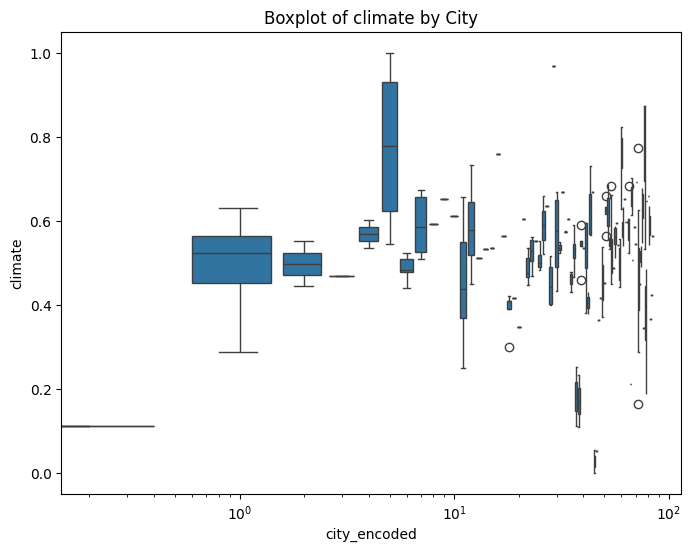

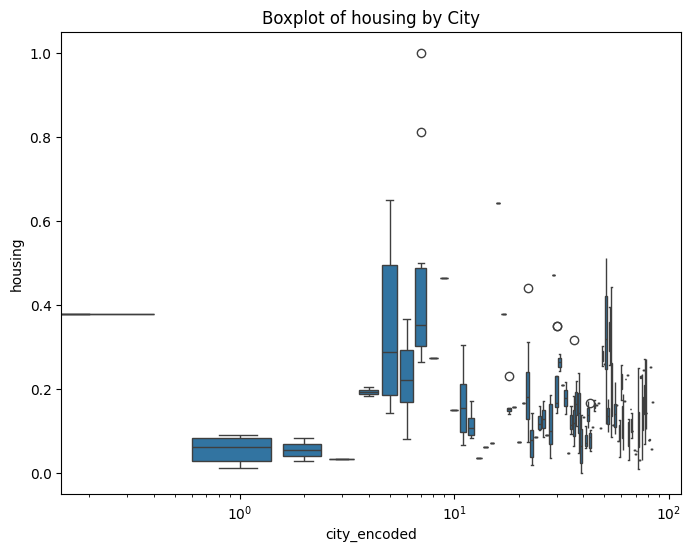

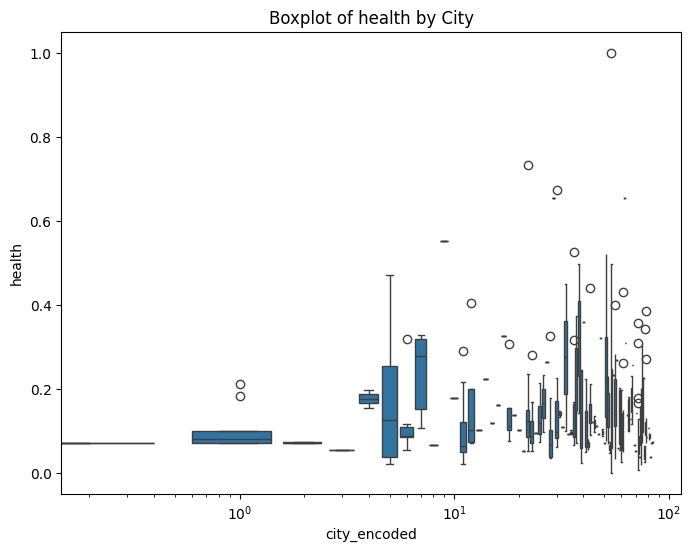

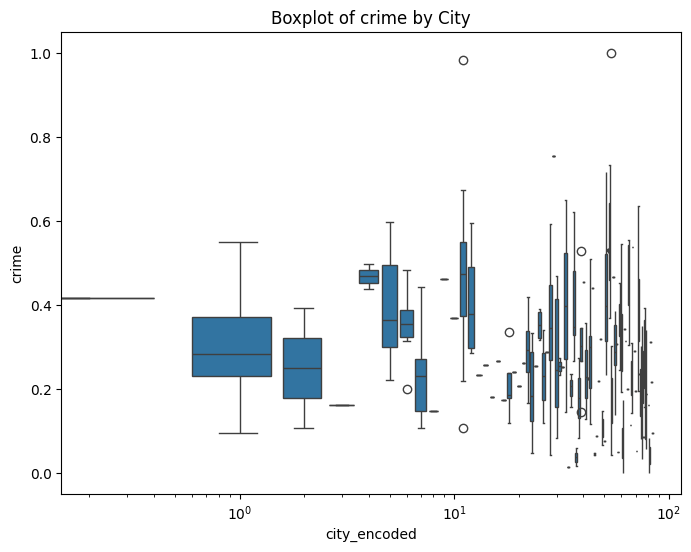

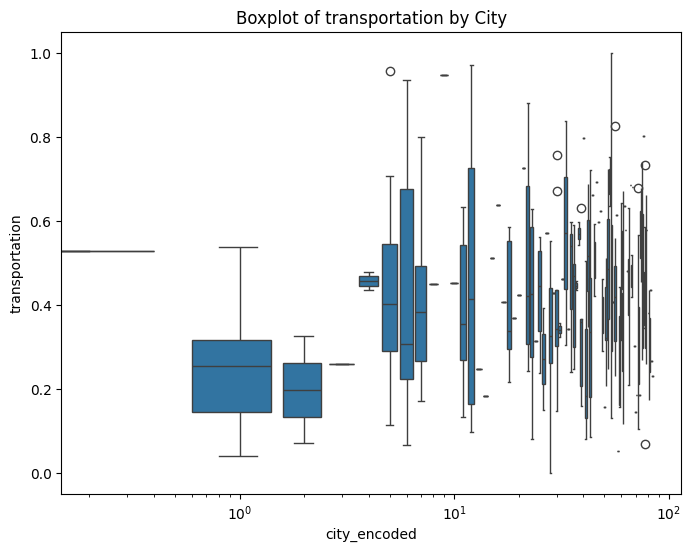

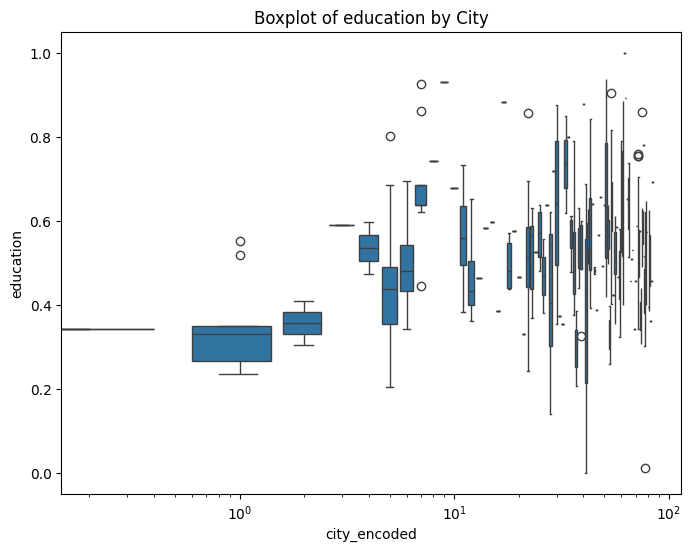

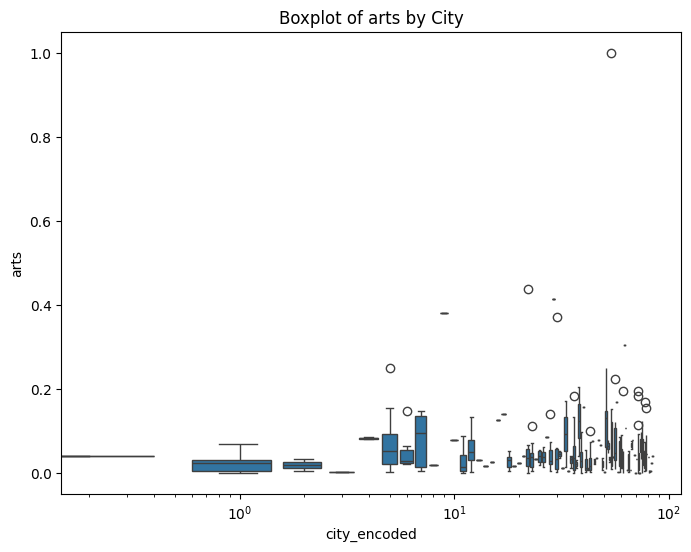

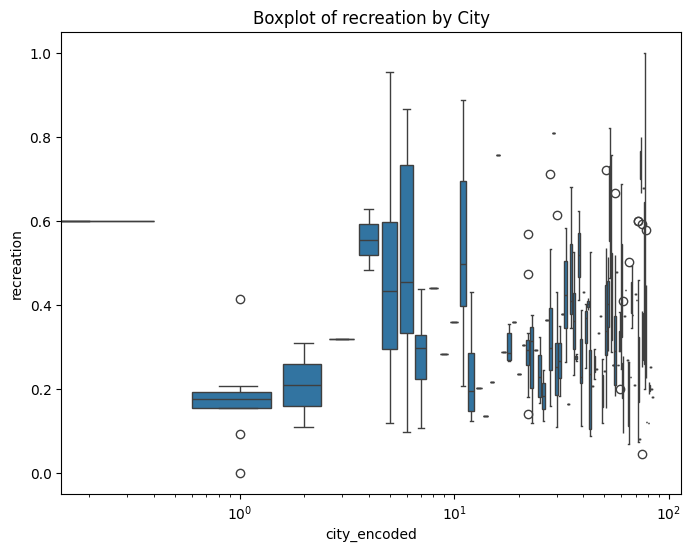

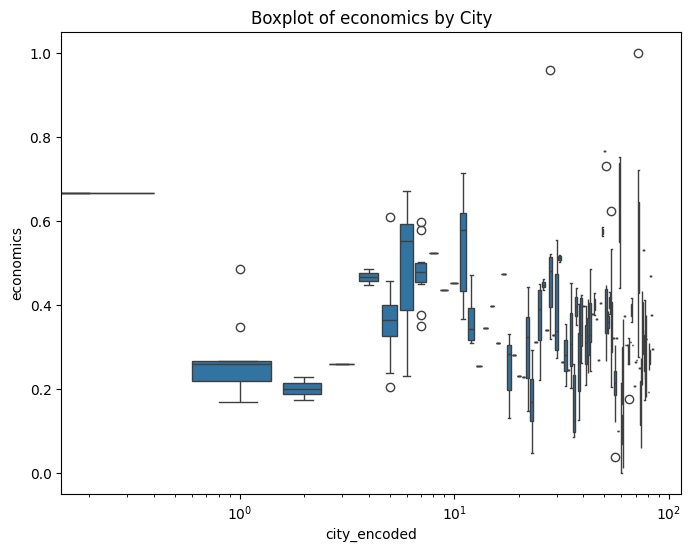

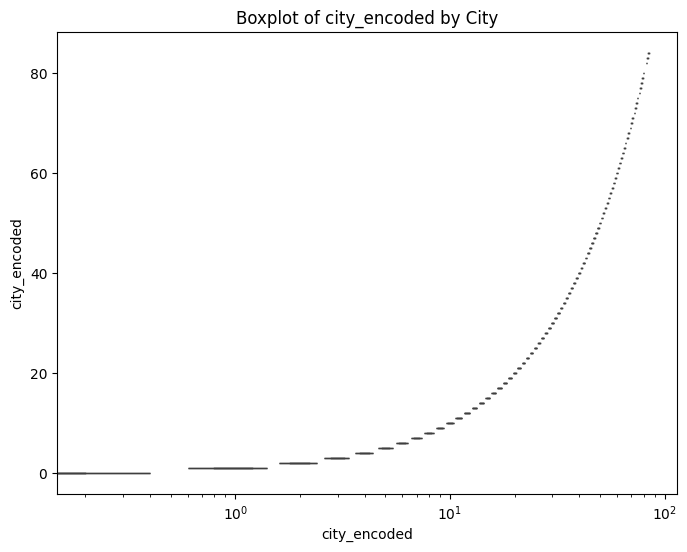

In [47]:
# Boxplot for each feature
for column in normalized_df_right.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='city_encoded', y=column, data=normalized_df_right)
    plt.xscale('log')  # Set y-axis to logarithmic scale
    plt.title(f'Boxplot of {column} by City')
    plt.show()

In [48]:
from scipy.stats import kruskal

for column in normalized_df_right.columns[:-1]:  
    stat, p_value = kruskal(*[group[column] for name, group in normalized_df_right.groupby('city_encoded')])
    
    print(f'Feature: {column}')
    print(f'Kruskal-Wallis Statistic: {stat}')
    print(f'P-value: {p_value}')
    
    if p_value < 0.05:
        print('There are significant differences between at least two groups.')
    else:
        print('No significant differences between groups.')
    print('\n')

Feature: climate
Kruskal-Wallis Statistic: 220.69350505139974
P-value: 3.191017785215515e-14
There are significant differences between at least two groups.


Feature: housing
Kruskal-Wallis Statistic: 202.45737055535457
P-value: 8.929437695092373e-12
There are significant differences between at least two groups.


Feature: health
Kruskal-Wallis Statistic: 112.35595775999646
P-value: 0.021122892591491305
There are significant differences between at least two groups.


Feature: crime
Kruskal-Wallis Statistic: 186.8178766623875
P-value: 8.698511970114627e-10
There are significant differences between at least two groups.


Feature: transportation
Kruskal-Wallis Statistic: 89.7604885165541
P-value: 0.3135415406869533
No significant differences between groups.


Feature: education
Kruskal-Wallis Statistic: 147.43411637790598
P-value: 2.339783719936724e-05
There are significant differences between at least two groups.


Feature: arts
Kruskal-Wallis Statistic: 92.90022264465094
P-value: 0.2373

In [49]:
from scipy.stats import f_oneway

# Assuming 'city_encoded' is the encoded city column
for column in normalized_df_right.columns[:-1]:  # Exclude the 'city_encoded' column
    stat, p_value = f_oneway(*[group[column] for name, group in normalized_df_right.groupby('city_encoded')])
    
    print(f'Feature: {column}')
    print(f'ANOVA Statistic: {stat}')
    print(f'P-value: {p_value}')
    
    if p_value < 0.05:
        print('There are significant differences between at least two groups.')
    else:
        print('No significant differences between groups.')
    print('\n')

Feature: climate
ANOVA Statistic: 7.209508134328227
P-value: 5.1832756040558904e-34
There are significant differences between at least two groups.


Feature: housing
ANOVA Statistic: 4.40271247410392
P-value: 9.721765168798464e-20
There are significant differences between at least two groups.


Feature: health
ANOVA Statistic: 1.3293298074496587
P-value: 0.04916795541225358
There are significant differences between at least two groups.


Feature: crime
ANOVA Statistic: 3.1370167694336115
P-value: 2.9340936045290103e-12
There are significant differences between at least two groups.


Feature: transportation
ANOVA Statistic: 1.1393744059771398
P-value: 0.222199971872451
No significant differences between groups.


Feature: education
ANOVA Statistic: 2.560689581227306
P-value: 9.852941348635646e-09
There are significant differences between at least two groups.


Feature: arts
ANOVA Statistic: 1.1053922551360278
P-value: 0.27668099768865045
No significant differences between groups.


Feat